### River Records

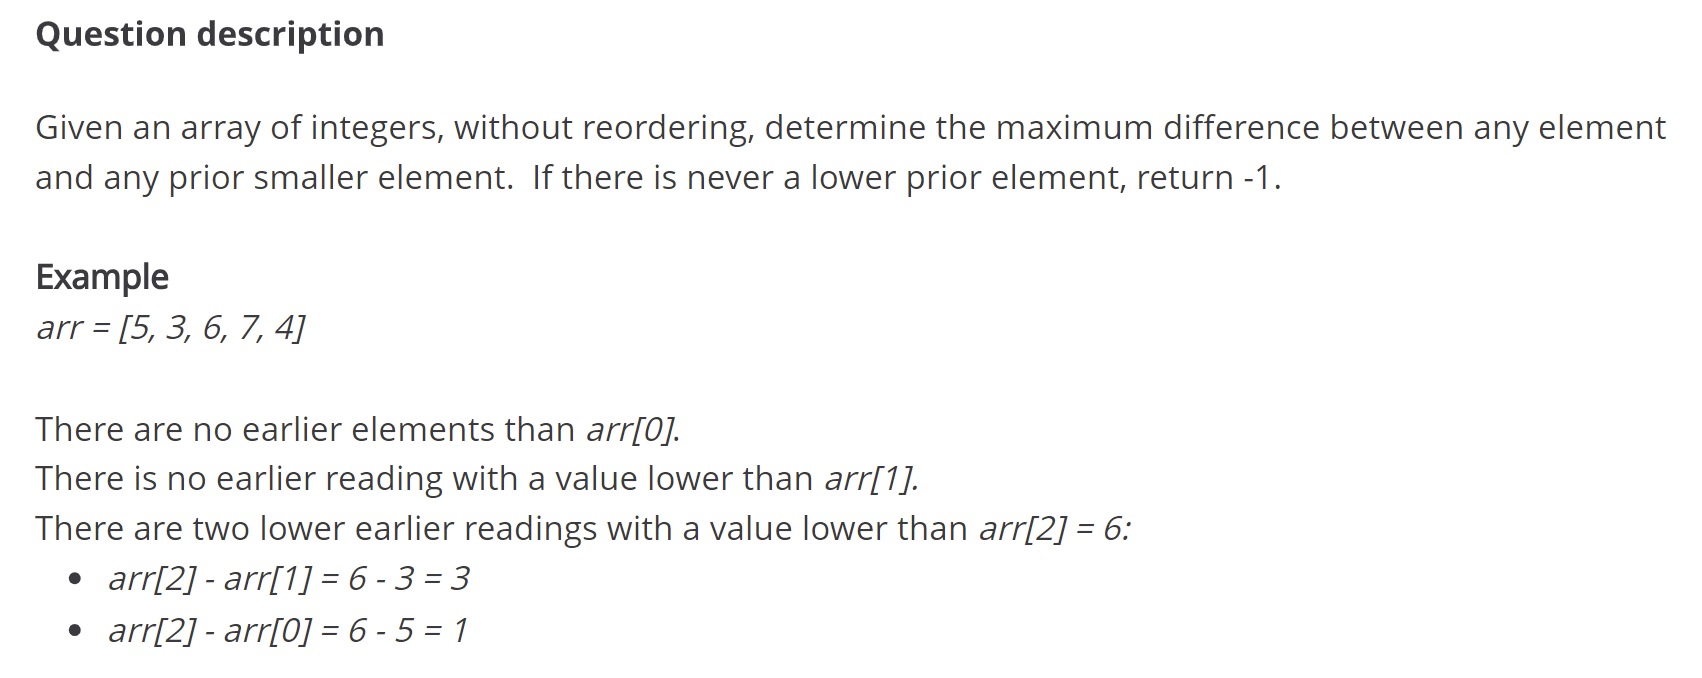
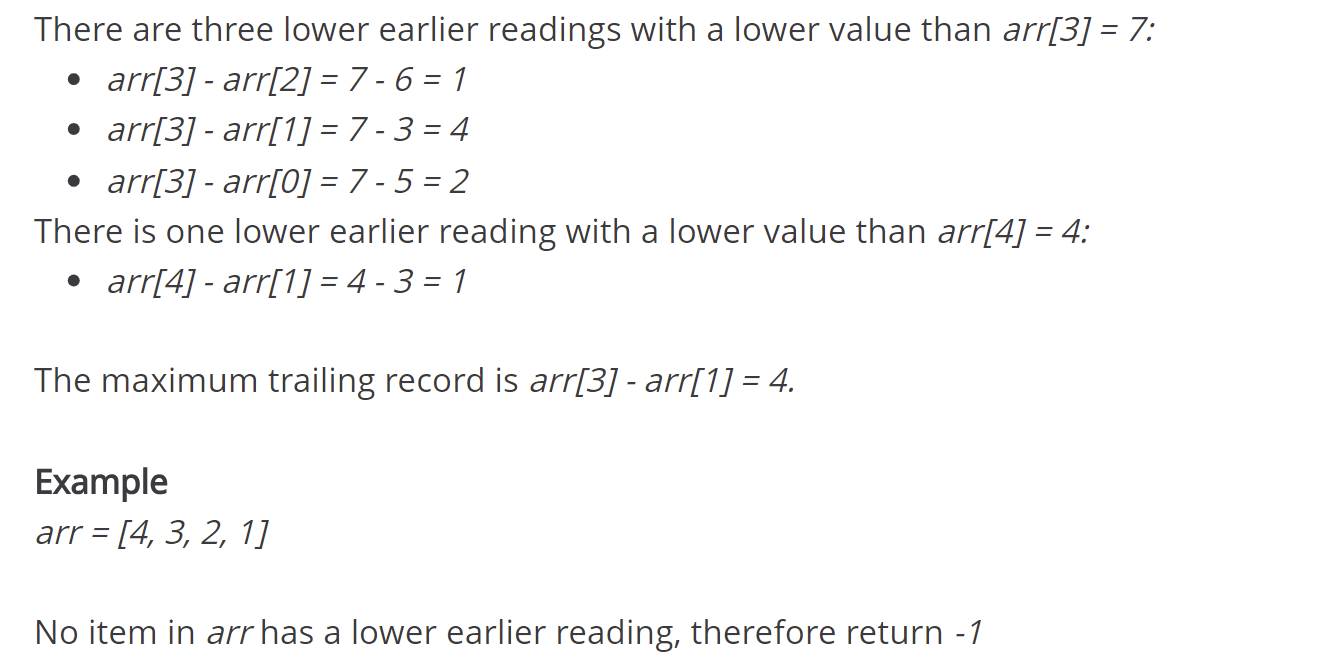

Solution 1:

python

def maxTrailing(arr):
    if len(arr) < 2:
        return -1
    
    min_val = arr[0]
    max_diff = -1
    
    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
        elif arr[i] > min_val:
            max_diff = max(max_diff, arr[i] - min_val)
        else:
            continue
    
    return max_diff

Explanation:

    Initialization:
        min_val: Initialize with the first element of the array arr[0]. This variable keeps track of the minimum value encountered so far.
        max_diff: Initialize with -1. This variable stores the maximum difference found between any element and any prior smaller element.

    Iterating through the array:
        Start iterating from the second element (i = 1) to the end of the array.
        Compare each element arr[i] with min_val.
            If arr[i] is less than min_val, update min_val to arr[i] because we found a new smaller element.
            If arr[i] is greater than min_val, calculate the difference arr[i] - min_val and update max_diff if this difference is greater than the current max_diff.
            If arr[i] equals min_val, continue to the next iteration.

    Result:
        After iterating through the array, max_diff will hold the maximum difference found between any element and any prior smaller element.
        If no such difference was found (i.e., all elements are non-increasing or the array length is less than 2), max_diff remains -1, which is returned.

In [1]:
def maxTrailing(arr):
    # If array has less than 2 elements, return -1 (no valid pairs to compare)
    if len(arr) < 2:
        return -1
    
    # Initialize variables
    min_val = arr[0]  # Initialize min_val to the first element of the array
    max_diff = -1     # Initialize max_diff to -1 (no valid difference found yet)
    
    # Iterate through the array starting from the second element
    for i in range(1, len(arr)):
        # If current element is less than current min_val, update min_val to the current element
        if arr[i] < min_val:
            min_val = arr[i]
        # If current element is greater than min_val, calculate difference
        elif arr[i] > min_val:
            max_diff = max(max_diff, arr[i] - min_val)  # Update max_diff if found a larger difference
    
        # If current element is equal to min_val, continue to next iteration
        else:
            continue
    
    # Return the maximum difference found
    return max_diff

In [2]:
print(maxTrailing([3, 8, 1, 5, 9]))  # Expected output: 8 (9 - 1)
print(maxTrailing([9, 7, 5, 3, 1]))  # Expected output: -1 (no valid pair)
print(maxTrailing([1, 2, 3, 4, 5]))  # Expected output: 4 (5 - 1)
print(maxTrailing([5, 4, 3, 2, 1]))  # Expected output: -1 (no valid pair)
print(maxTrailing([2, 1]))           # Expected output: -1 (no valid pair)
print(maxTrailing([1]))              # Expected output: -1 (no valid pair)
print(maxTrailing([]))               # Expected output: -1 (no valid pair)

8
-1
4
-1
-1
-1
-1


Explanation:

    Initialization:
        ans: Initialize with -1. This will eventually store the maximum difference found.
        left: This is the pointer for the leftmost element of the sliding window.
        lowest: Initialize with math.inf (infinity). This keeps track of the smallest element encountered so far.

    Iterating through the array:
        Loop through each element right in the array arr.
        Update lowest to be the minimum of its current value and right, ensuring lowest always holds the smallest element seen up to the current right.

    Sliding window approach:
        While the element at arr[left] (the left boundary of the window) is greater than lowest, increment left. This moves the window to the right until arr[left] is less than or equal to lowest.
        Calculate the potential difference right - arr[left] and update ans if this difference is greater than the current ans.
        This ensures that ans contains the maximum difference found between any element and any prior smaller element within the current sliding window.

    Final check and return:
        If ans remains -1 after processing the array, return -1 (indicating no valid difference was found).
        Otherwise, return ans, which holds the maximum difference found.

In [2]:
from collections import deque
import math

def maxTrailing(arr):
    ans = -1          # Initialize ans to -1 (no valid difference found yet)
    left = 0          # Initialize left pointer for sliding window
    lowest = math.inf # Initialize lowest to infinity (to find minimum value dynamically)
    
    # Iterate through each element in the array
    for right in arr:
        lowest = min(lowest, right)  # Update lowest to be the minimum of current lowest and current element
        
        # Slide the left pointer until arr[left] <= lowest
        while(arr[left] > lowest):
            left += 1  # Move left pointer to the right
        
        # Calculate potential difference and update ans if found larger difference
        if(right > arr[left]):
            ans = max(ans, right - arr[left])
            
    # Return -1 if no valid difference found, otherwise return the maximum difference
    return -1 if not ans else ans

In [ ]:
print(maxTrailing([3, 8, 1, 5, 9]))  # Expected output: 8 (9 - 1)
print(maxTrailing([9, 7, 5, 3, 1]))  # Expected output: -1 (no valid pair)
print(maxTrailing([1, 2, 3, 4, 5]))  # Expected output: 4 (5 - 1)
print(maxTrailing([5, 4, 3, 2, 1]))  # Expected output: -1 (no valid pair)
print(maxTrailing([2, 1]))           # Expected output: -1 (no valid pair)
print(maxTrailing([1]))              # Expected output: -1 (no valid pair)
print(maxTrailing([]))               # Expected output: -1 (no valid pair)

Comparison:

    Solution 1 uses a single pass through the array with two variables (min_val and max_diff) to track the minimum value and calculate the maximum difference.
    Solution 2 employs a sliding window approach with two pointers (left and right) to dynamically adjust the window based on the minimum value encountered (lowest).

Both solutions aim to find the maximum difference efficiently without reordering the array, each utilizing different strategies (iteration vs. sliding window) to achieve the desired result.

Time Complexity Analysis:
Solution 1:

    Time Complexity: O(n)O(n)
        The solution iterates through the array once (from index 1 to n-1) to find the maximum difference.
        Each element is processed in constant time, and there is a single pass through the array.
        Therefore, the time complexity is linear with respect to the size of the input array nn.

    Space Complexity: O(1)O(1)
        The solution uses only a constant amount of extra space for variables (min_val, max_diff, and loop variables).
        Hence, the space complexity is constant.

Solution 2:

    Time Complexity: O(n)O(n)
        This solution also operates in linear time complexity.
        It iterates through the array once using two pointers (left and right) and adjusts them dynamically.
        The inner while loop adjusts the left pointer, but each element is processed a constant number of times overall.
        Therefore, the time complexity remains O(n)O(n).

    Space Complexity: O(1)O(1)
        Similar to Solution 1, Solution 2 uses only a constant amount of extra space besides the input array.
        It uses variables for pointers (left), lowest, and ans.
        Thus, the space complexity is constant